In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/taitanictrain/datasets_11657_16098_train.csv


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
df=pd.read_csv("/kaggle/input/taitanictrain/datasets_11657_16098_train.csv")

In [6]:
df.shape

(891, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


1. Categorical variable = Survived, Pclass, Sex, SibSp, Parch, Embarked	
2. Numerical variable = Age Fare

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df["Survived"]=df["Survived"].astype("category")
df["Pclass"]=df["Pclass"].astype("category")
df["Sex"]=df["Sex"].astype("category")
df["SibSp"]=df["SibSp"].astype("category")
df["Parch"]=df["Parch"].astype("category")
df["Embarked"]=df["Embarked"].astype("category")


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    category
 7   Parch        891 non-null    category
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(6), float64(2), int64(1), object(3)
memory usage: 48.3+ KB


**Data cleaning and some conclusions**
1. The Age, Cabin and Embarked columns have missing values.
2. Most of the values of the Cabin column are missing, that's why I'll drop this column.
3. I have already converted inappropriate data types into appropriate data types. Therefore, memory usage is decreased.

In [12]:
df.describe()

,PassengerId,Age,Fare
count,891.000000,714.000000,891.000000
mean,446.000000,29.699118,32.204208
std,257.353842,14.526497,49.693429
min,1.000000,0.420000,0.000000
25%,223.500000,20.125000,7.910400
50%,446.000000,28.000000,14.454200
75%,668.500000,38.000000,31.000000
max,891.000000,80.000000,512.329200


In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
df["Age"].fillna(df["Age"].mean(), inplace=True)

In [15]:
df.drop(columns=["Cabin"], inplace=True)

In [16]:
df.drop(columns=["PassengerId"], inplace=True)

In [17]:
df.drop(columns=["Ticket"], inplace=True)

In [18]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [19]:
df["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [20]:
df["Embarked"].fillna("S", inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       891 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Fare      891 non-null    float64 
 8   Embarked  891 non-null    category
dtypes: category(6), float64(2), object(1)
memory usage: 27.4+ KB


 **Exploratory Data Analysis**
1. Analysis
   a) Univariate Analysis
   b) Multivariate Analysis
   
3. Feature Engineering
   a) Creating new columns
   b) Modifying existing ones
   
4. Handling Outliers
   a) Detect outliers
   b) Remove outliers

In [22]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

<Axes: xlabel='Survived', ylabel='count'>

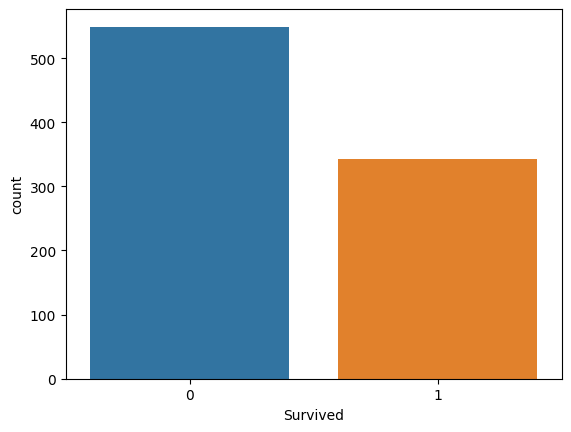

In [23]:
#Univariate analysis
#Lets start with survived colums
df["Survived"].value_counts(normalize=True)*100
sns.countplot(x="Survived", data=df)

**Comment:** Most of the people are died around 62% and only 38% people are alive which is also shown in countplot.

<Axes: xlabel='Pclass', ylabel='count'>

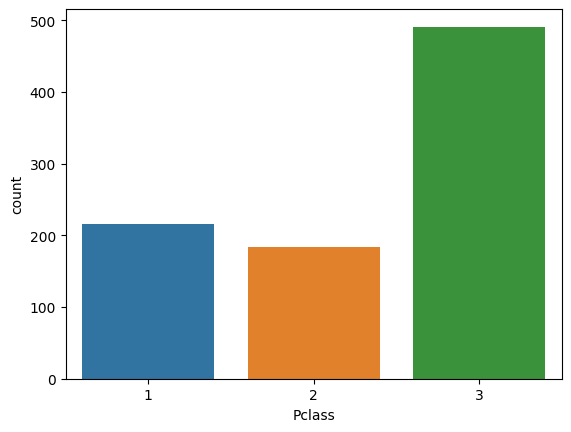

In [24]:
#Pclass column
df["Pclass"].value_counts(normalize=True)*100
sns.countplot(x="Pclass", data=df)

**Comment:** Most people travel in 3rd class seats, around 55% compared to 1st and 2nd class. Most people travel in 1st class seats compared to 2nd class. I hope 1st and 2nd class seat prices are near.

Sex
male      64.758698
female    35.241302
Name: proportion, dtype: float64


<Axes: xlabel='Sex', ylabel='count'>

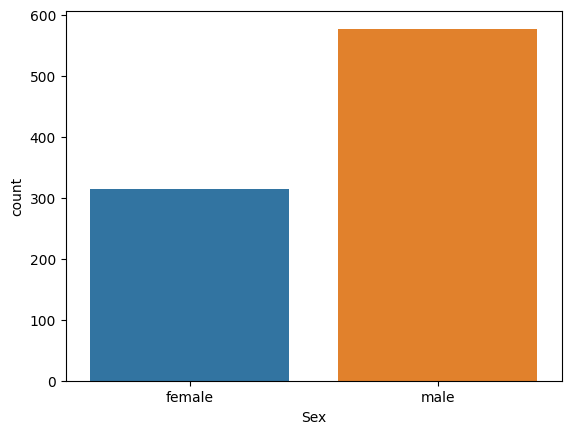

In [25]:
#Sex column
print(df["Sex"].value_counts(normalize=True)*100)
sns.countplot(x="Sex", data=df)

**Comment:** Males(65%) travel more compared to females(35%).

SibSp
0    68.237935
1    23.456790
2     3.142536
4     2.020202
3     1.795735
8     0.785634
5     0.561167
Name: proportion, dtype: float64


<Axes: xlabel='SibSp', ylabel='count'>

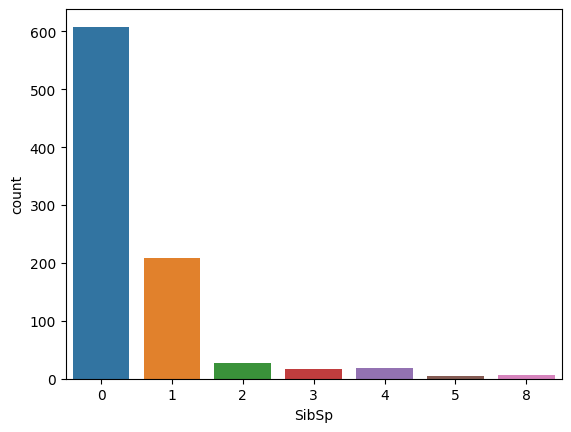

In [26]:
#SibSp column
print(df["SibSp"].value_counts(normalize=True)*100)
sns.countplot(x="SibSp", data=df)

**Comment:** Most people travel alone around 68%. Only 23% people travel with one person.

Parch
0    76.094276
1    13.243547
2     8.978676
3     0.561167
5     0.561167
4     0.448934
6     0.112233
Name: proportion, dtype: float64


<Axes: xlabel='Parch', ylabel='count'>

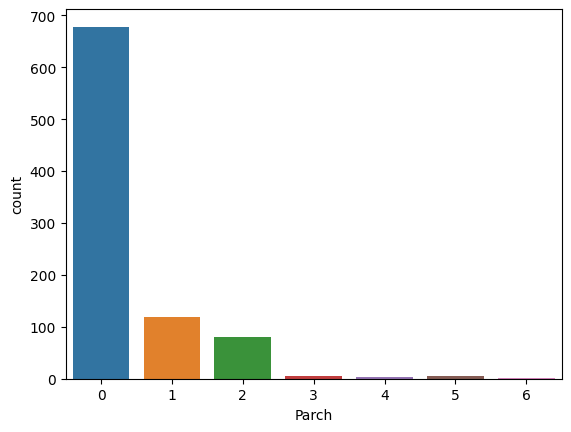

In [27]:
#Parch column
print(df["Parch"].value_counts(normalize=True)*100)
sns.countplot(x="Parch", data=df)

**Comment:** Around 76% of parents travel without children and only 13% of parents travel with one child.

Embarked
S    72.502806
C    18.855219
Q     8.641975
Name: proportion, dtype: float64


<Axes: xlabel='Embarked', ylabel='count'>

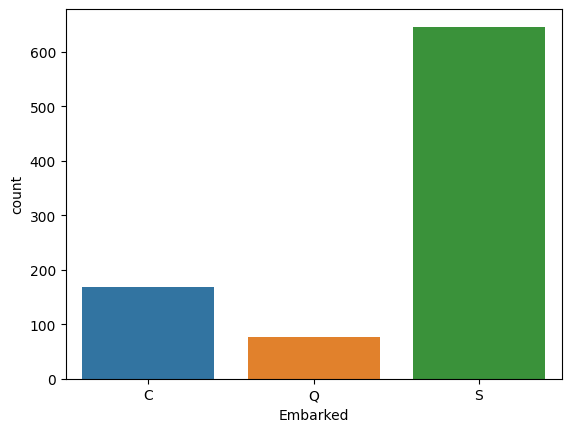

In [28]:
#Embarked column
print(df["Embarked"].value_counts(normalize=True)*100)
sns.countplot(x="Embarked", data=df)

**Comment:** Most of the people travel in S city around 72%.

Skewness:  0.4344880940129924
Kurtusis:  0.966279302664522


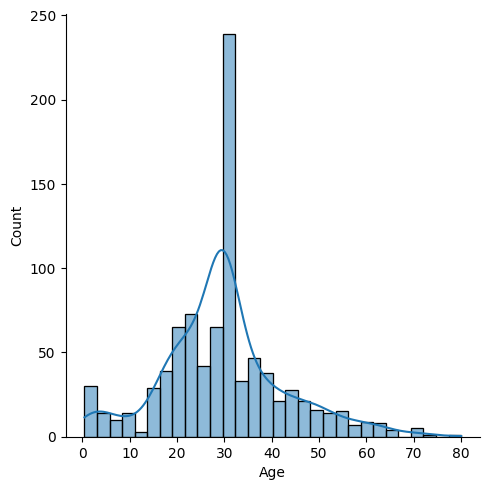

In [29]:
#Age column
sns.displot(x="Age", data=df, kde=True)
print("Skewness: ", df["Age"].skew())
print("Kurtusis: ", df["Age"].kurt())

<Axes: xlabel='Age'>

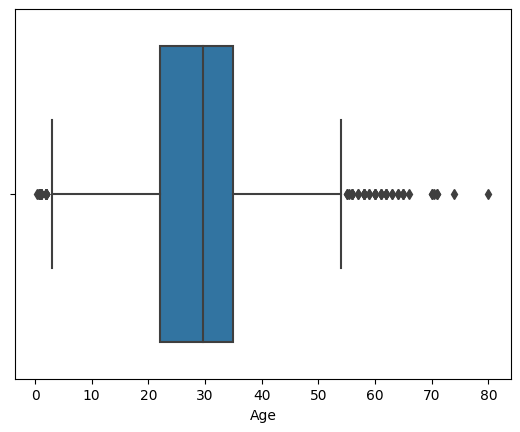

In [30]:
sns.boxplot(x="Age", data=df)

**Comment:** Most of the people are 20 to 40 age group. Few people are around 0 years and above 54 years. This data looks normal.

Skewness:  4.787316519674893
Kurtusis:  33.39814088089868


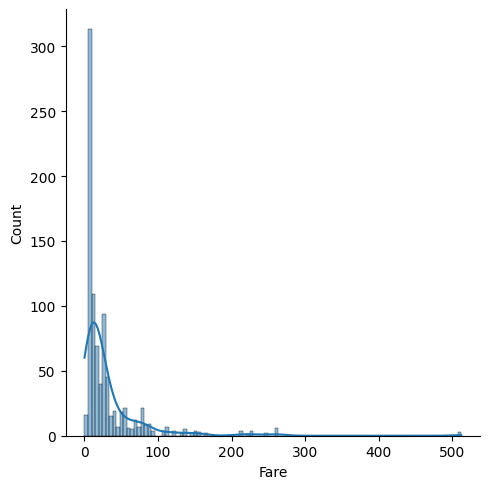

In [31]:
#Fare column
sns.displot(x="Fare", data=df, kde=True)
print("Skewness: ", df["Fare"].skew())
print("Kurtusis: ", df["Fare"].kurt())

<Axes: xlabel='Fare'>

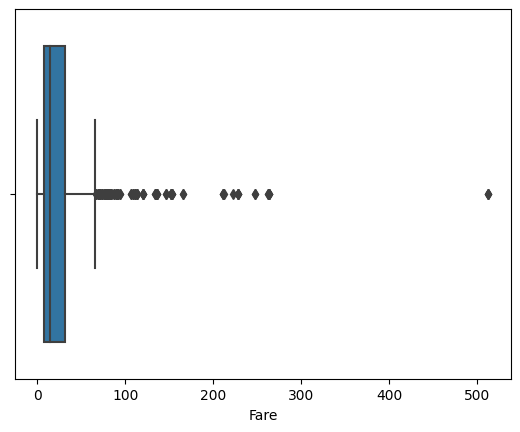

In [32]:
sns.boxplot(x="Fare", data=df)

**Comment:** This data is not normal (positively skewed and leptokurtic). Most of people's fare is low. Outlier is available in here.

Survived,0,1
Sex,,
female,25.80,74.20
male,81.11,18.89


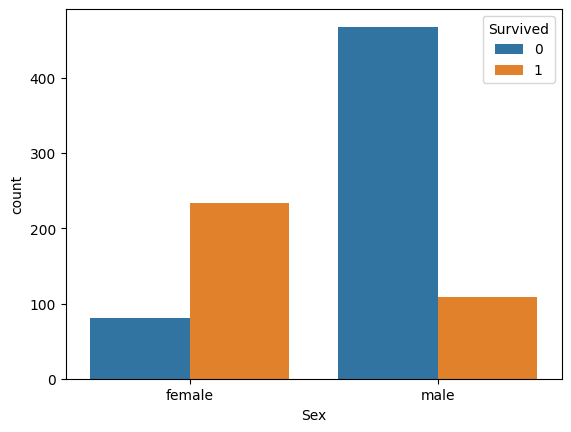

In [33]:
#Multivariate analysis
#Survived with Sex columns
sns.countplot(data=df, x="Sex", hue="Survived")
pd.crosstab(df["Sex"], df["Survived"]).apply(lambda x: round(x/x.sum()*100, 2), axis=1)

**Comment:** Males died more than females.

Survived,0,1
Pclass,,
1,37.04,62.96
2,52.72,47.28
3,75.76,24.24


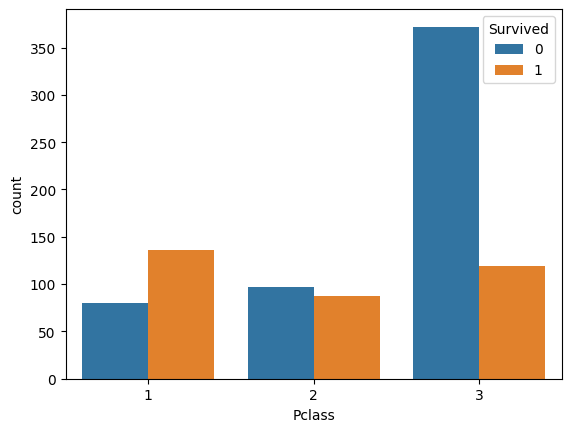

In [34]:
#Survived with Pclass columns
sns.countplot(data=df, x="Pclass", hue="Survived")
pd.crosstab(df["Pclass"], df["Survived"]).apply(lambda x: round(x/x.sum()*100, 2), axis=1)

**Comment:** Most of the 3rd class people died around 75%. 

Survived,0,1
Embarked,,
C,44.64,55.36
Q,61.04,38.96
S,66.10,33.90


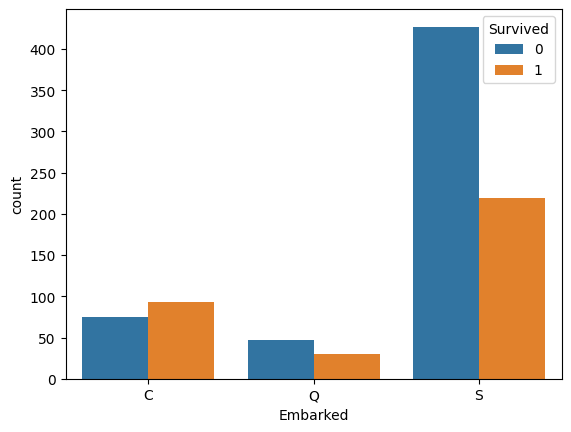

In [35]:
#Survived with Embarked columns
sns.countplot(data=df, x="Embarked", hue="Survived")
pd.crosstab(df["Embarked"], df["Survived"]).apply(lambda x: round(x/x.sum()*100, 2), axis=1)

**Comment:** Maximum people died in S city.

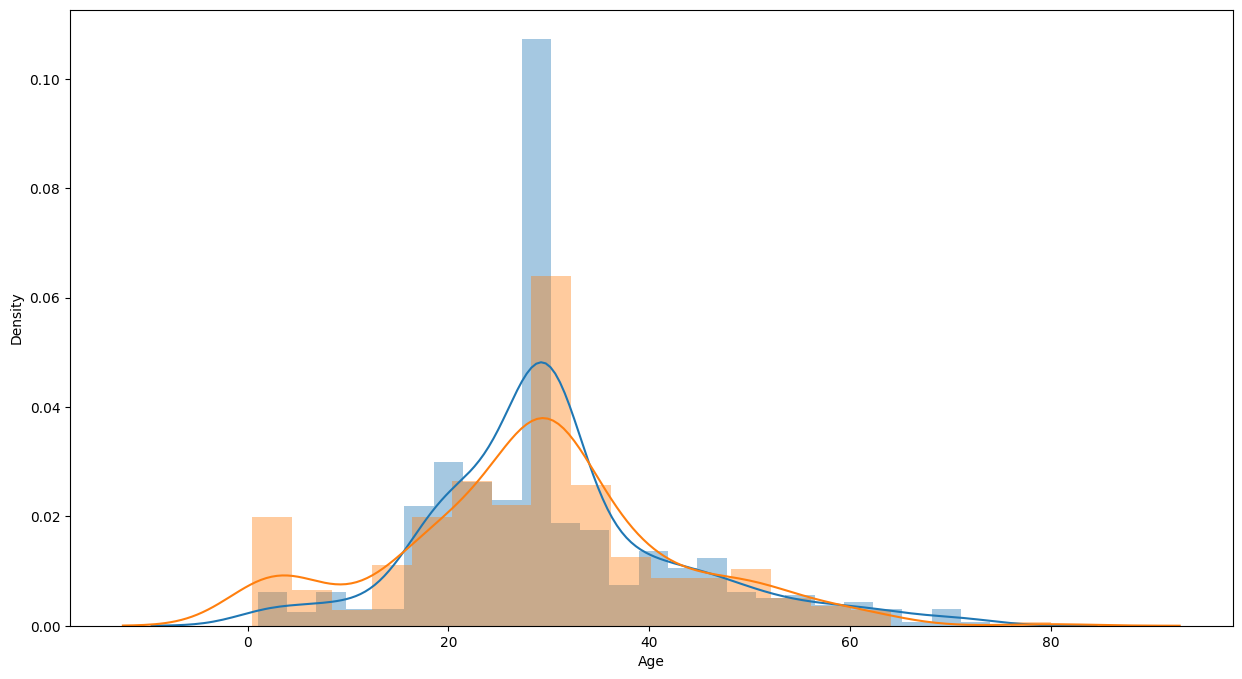

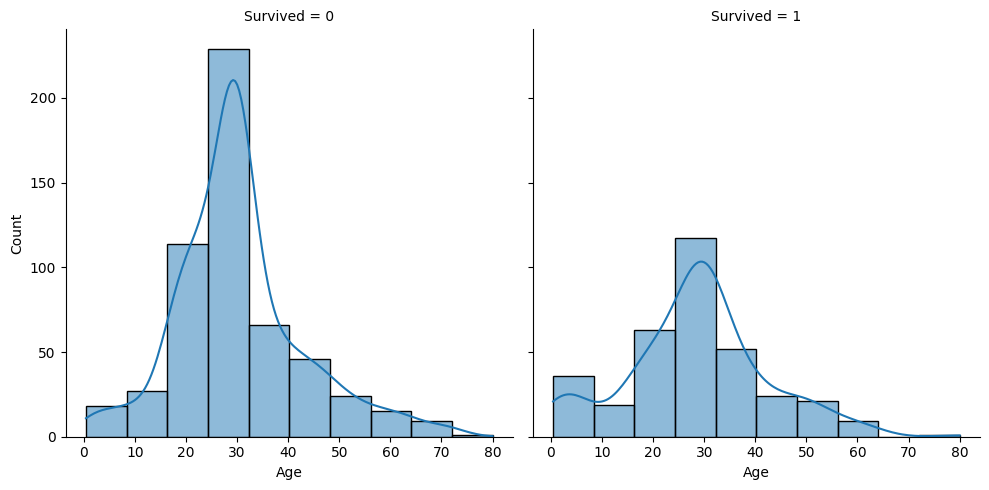

In [36]:
#Survived with Age
plt.figure(figsize=(15, 8))
sns.distplot(df[df["Survived"]==0]["Age"])
sns.distplot(df[df["Survived"]==1]["Age"])
sns.displot(data=df, x="Age", col="Survived", col_wrap=2, bins=10, kde=True)

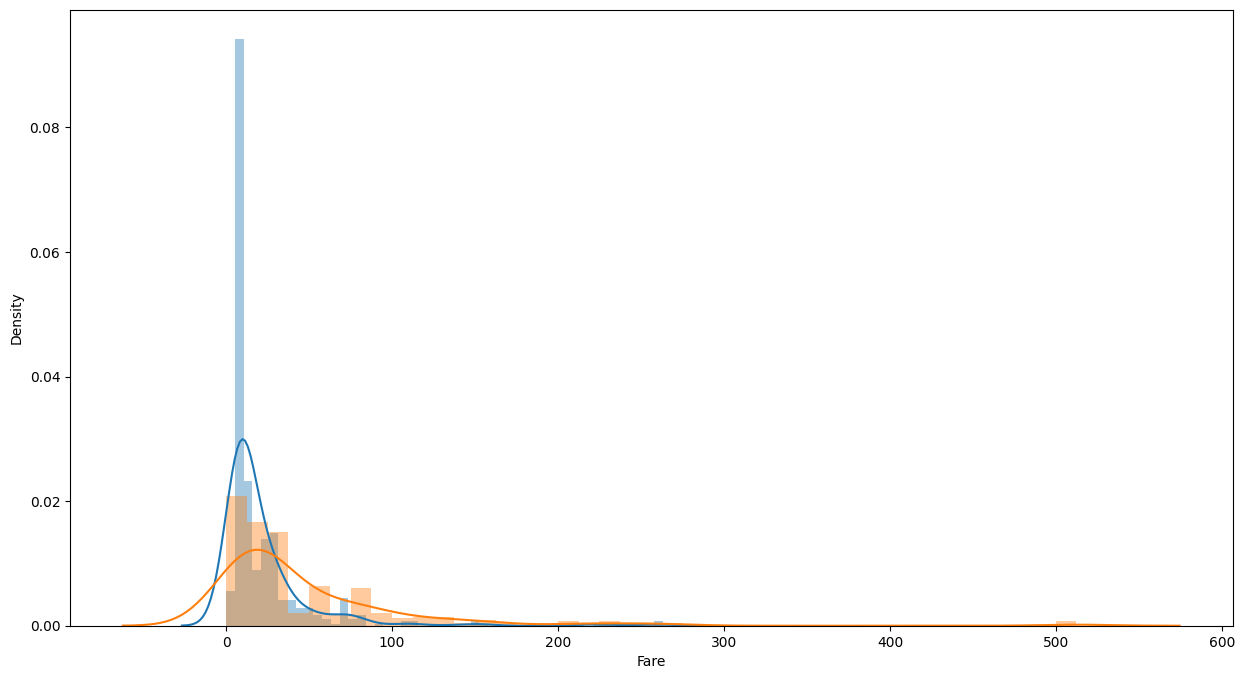

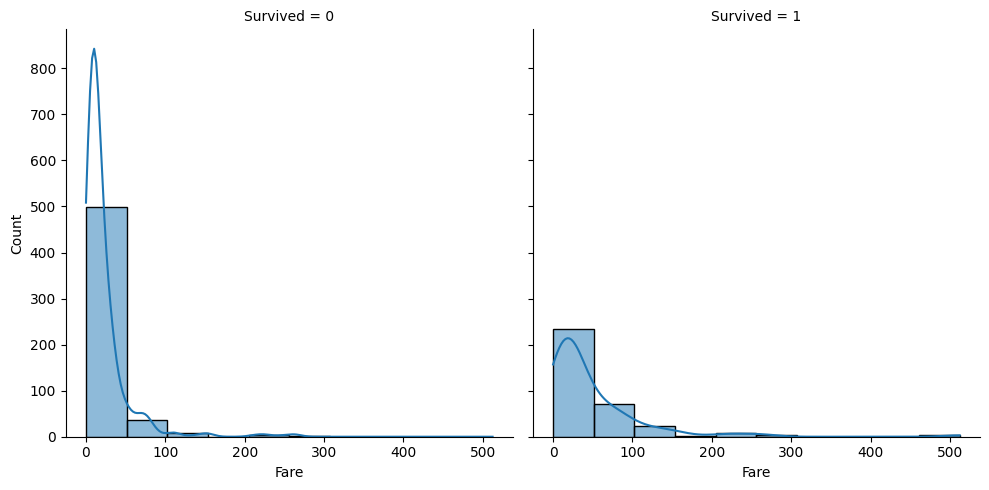

In [37]:
#Survived with Fare
plt.figure(figsize=(15, 8))
sns.distplot(df[df["Survived"]==0]["Fare"])
sns.distplot(df[df["Survived"]==1]["Fare"])
sns.displot(data=df, x="Fare", col="Survived", col_wrap=2, bins=10, kde=True)

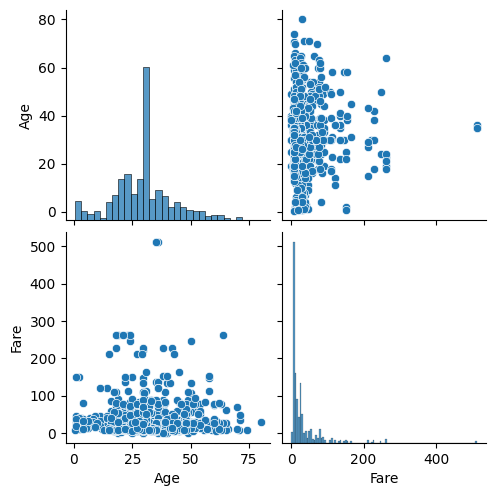

In [38]:
sns.pairplot(df)

In [39]:
df["Age"].corr(df["Fare"])

0.09156609328505758

In [40]:
df["Parch"] = df["Parch"].astype(int)
df["SibSp"] = df["SibSp"].astype(int)

In [41]:
df["Family_size"]=df["Parch"] + df["SibSp"]

In [42]:
df.sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family_size
847,0,3,"Markoff, Mr. Marin",male,35.0,0,0,7.8958,C,0
416,1,2,"Drew, Mrs. James Vivian (Lulu Thorne Christian)",female,34.0,1,1,32.5000,S,2
309,1,1,"Francatelli, Miss. Laura Mabel",female,30.0,0,0,56.9292,C,0
884,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,7.0500,S,0
579,1,3,"Jussila, Mr. Eiriik",male,32.0,0,0,7.9250,S,0


In [43]:
def family_type(number):
    if number == 0:
        return "Alone"
    elif number > 1 and number < 4:
        return "Medium"
    else:
        return "Large"
df["family_type"] = df["Family_size"].apply(family_type)

In [44]:
df.drop(columns=["SibSp", "Parch", "Family_size"], inplace=True)

In [45]:
df.sample(5)

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,family_type
530,1,2,"Quick, Miss. Phyllis May",female,2.000000,26.0000,S,Medium
326,0,3,"Nysveen, Mr. Johan Hansen",male,61.000000,6.2375,S,Alone
790,0,3,"Keane, Mr. Andrew ""Andy""",male,29.699118,7.7500,Q,Alone
108,0,3,"Rekic, Mr. Tido",male,38.000000,7.8958,S,Alone
683,0,3,"Goodwin, Mr. Charles Edward",male,14.000000,46.9000,S,Large


In [46]:
pd.crosstab(df["Survived"], df["family_type"]).apply(lambda x: round((x/x.sum())*100, 1), axis=1)

family_type,Alone,Large,Medium
Survived,,,
0,68.1,22.6,9.3
1,47.7,28.9,23.4


**Comment:** People died alone more often. 

In [47]:
#Detecting Outliers in Age Columns
df=df[df["Age"]<(df["Age"].mean()+ 3 * df["Age"].std())]
df.shape

(884, 8)

In [48]:
q1=df["Fare"].quantile(0.25)
q3=df["Fare"].quantile(0.75)
upper=q3+1.5*(q3-q1)
lower=q1-1.5*(q3-q1)
df=df[(df["Fare"]>lower) & (df["Fare"]<upper)]

In [49]:
df["family_type"]=df["family_type"].astype("category")

In [50]:
pd.get_dummies(data=df, columns=['Pclass', 'Sex', 'Embarked', 'family_type'], drop_first=True, dtype=int)

,Survived,Name,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_type_Large,family_type_Medium
0,0,"Braund, Mr. Owen Harris",22.000000,7.2500,0,1,1,0,1,1,0
2,1,"Heikkinen, Miss. Laina",26.000000,7.9250,0,1,0,0,1,0,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,53.1000,0,0,0,0,1,1,0
4,0,"Allen, Mr. William Henry",35.000000,8.0500,0,1,1,0,1,0,0
5,0,"Moran, Mr. James",29.699118,8.4583,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,"Montvila, Rev. Juozas",27.000000,13.0000,1,0,1,0,1,0,0
887,1,"Graham, Miss. Margaret Edith",19.000000,30.0000,0,0,0,0,1,0,0
888,0,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,23.4500,0,1,0,0,1,0,1
889,1,"Behr, Mr. Karl Howell",26.000000,30.0000,0,0,1,0,0,0,0


In [51]:
df.drop(columns=["Name"], inplace=True)

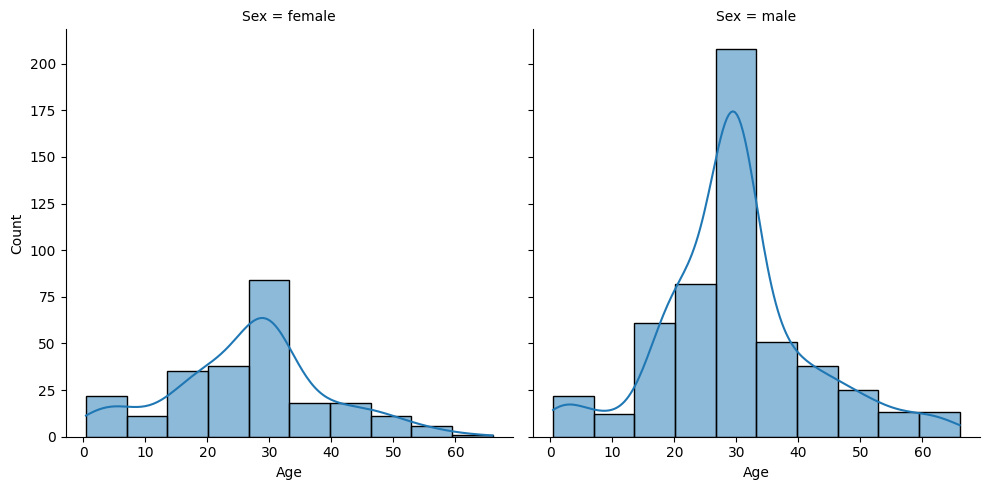

In [52]:
sns.displot(data=df, x="Age", col="Sex", col_wrap=2, bins=10, kde=True)

In [53]:
df.groupby(["Survived", "Pclass", "Sex"])[["Age", "Fare"]].mean()

Age       Fare
Survived Pclass Sex                         
0        1      female  50.000000  28.712500
                male    41.832455  33.290862
         2      female  36.000000  18.250000
                male    33.234045  16.417598
         3      female  25.011415  17.608880
                male    27.622886  11.454476
1        1      female  34.272975  45.873085
                male    36.049853  36.107920
         2      female  28.127118  22.288989
                male    17.631073  21.095100
         3      female  22.930249  12.464526
                male    23.696001  15.579696

In [56]:
df["Age"].corr(df["Survived"])

-0.11902492157683332

In [55]:
from statsmodels.formula.api import ols
reg=ols("Age~Fare", data=df).fit()
print(reg.params)

Intercept    27.616464
Fare          0.064508
dtype: float64
